In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

from sktime.transformations.panel.dictionary_based import PAA

from sktime.transformations.series.sax import SAX2

In [2]:
def load_npy(filename):
    return np.load(filename)

def approximate(ts, approx):
    return approx.fit_transform(ts)

In [3]:
# code for saving ts
# np.savez('nome_file', X)

<center> <h1>Load Time Series</h1> </center>

In [3]:
# reload full-length time series
X_y_ids = load_npy('X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [16]:
X.shape

(10000, 1, 1280)

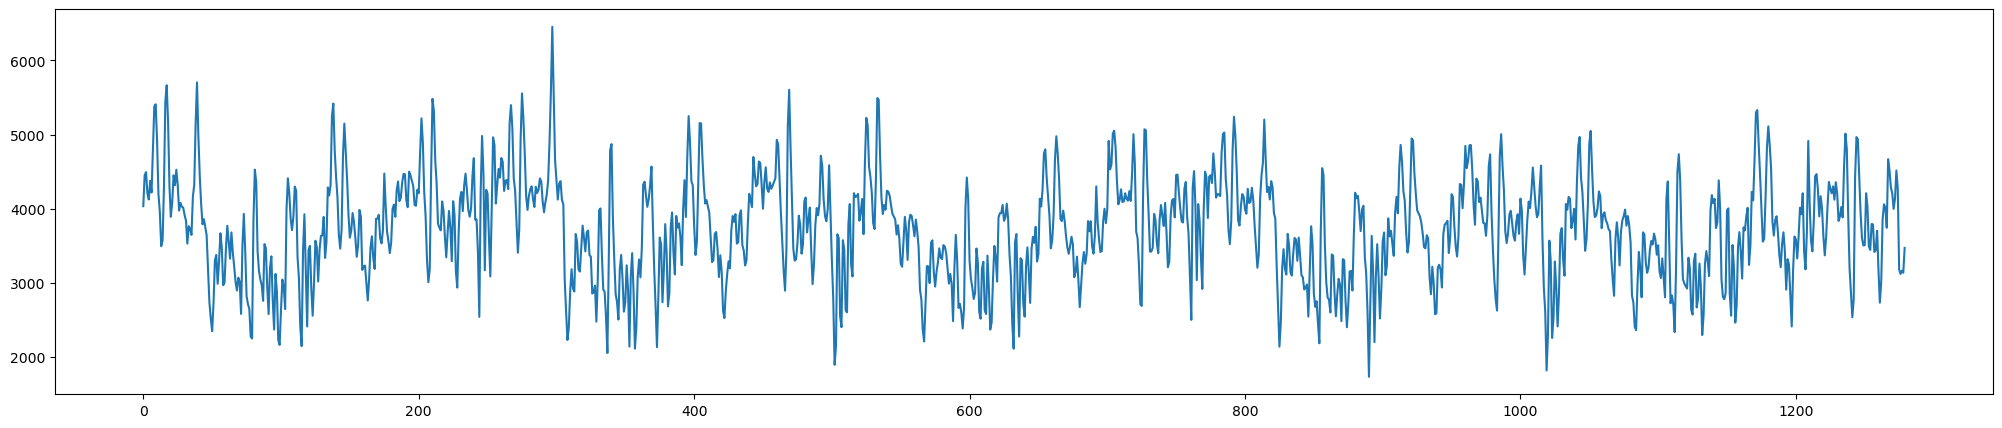

In [4]:
# Visualize a Time Series
ind = 0

plt.figure(figsize=(25,5))
plt.plot(X[ind][0])
plt.show()

<center><h1> Approximation </h1></center>

### Plot PAA-approximated TS

In [6]:
paa = PAA(num_intervals=100)

In [7]:
# Use this to turn a non-approximated ts in an approximated one (with PAA)
#X_paa = np.array([[approximate(ts[0], paa)[:,0]] for ts in X])

In [8]:
def discretize_paa_plot(a):
    b = []
    for elem in a:
        b = b + [elem]*13
    return b

In [9]:
#version 1
ind = 0

ts_to_show = pd.Series(X[ind][0])
paa_ts_to_show = pd.Series(X_paa[ind][0])
#paa_ts_to_show = pd.Series(discretize(X_paa[ind][0]))


fig, ax1 = plt.subplots()
plt.grid(False)
ax1.plot(ts_to_show.index, ts_to_show, label="ts")
ax2 = ax1.twiny()
ax2.plot(paa_ts_to_show.index, paa_ts_to_show, "r-", label="paa")
plt.grid(False)

NameError: name 'X_paa' is not defined

In [ ]:
#version 2
ind = 0

ts_to_show = pd.Series(X[ind][0])
#paa_ts_to_show = pd.Series(X_paa[ind][0])
paa_ts_to_show = pd.Series(discretize_paa_plot(X_paa[ind][0]))

plt.figure(figsize=(20,10))
plt.plot(ts_to_show)
plt.plot(b)
plt.show()

### SAA - Symbolic Aggregate Approximation

In [ ]:
sax = SAX2(word_size=20, alphabet_size=5)

In [ ]:
X_sax = sax.fit_transform(X_paa)

In [ ]:
X_sax[0][0]

In [ ]:
ind = 0

ts_to_show = pd.Series(X[ind][0])
paa_ts_to_show = pd.Series(X_paa[ind][0])
sax_ts_to_show = pd.Series(X_sax[ind][0])

fig, ax1 = plt.subplots()
plt.grid(False)
ax1.plot(ts_to_show.index, (ts_to_show - ts_to_show.mean()) / ts_to_show.std(), label="ts")
# bin_edges = scipy.stats.norm.ppf(np.linspace(0, 1, 6)[1:-1])
# ax1.hlines(bin_edges, 0, len(y), color="black", linestyles="dashed", alpha=0.5)
ax2 = ax1.twiny()
ax2.plot(sax_ts_to_show.index, (sax_ts_to_show - sax_ts_to_show.mean()) / sax_ts_to_show.std(), "r-", label="sax")
ax2 = ax1.twiny()
ax2.plot(paa_ts_to_show.index, (paa_ts_to_show - paa_ts_to_show.mean()) / paa_ts_to_show.std(), "y-", label="paa")
plt.grid(False)
plt.legend()
plt.show()

## Load Approximated Time Series

In [18]:
# reload paa-approximated time series

X_paa_file = load_npy('X_PAA_appr.npz') 
X_paa = X_paa_file["arr_0"]


In [19]:
X_paa.shape

(10000, 1, 100)

In [5]:
# reload paa_sax-approximated time series

X_paa_sax_file = load_npy('X_PAA_SAX_appr.npz') 
X_paa_sax = X_paa_sax_file["arr_0"]

<center> <h1> Clustering</h1> </center>

In [12]:
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series

In [9]:
X_train = X_paa_sax

In [14]:
df = pd.DataFrame(np.squeeze(X_train))

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3,0,3,3,4,0,3,2,2,0,2,3,3,0,2,3,2,1,2,3
1,1,2,0,1,3,2,3,3,2,2,3,2,2,2,2,3,1,2,1,3
2,2,1,2,0,0,3,2,3,4,4,4,4,3,0,1,1,3,0,2,0
3,3,4,1,2,2,3,1,3,2,3,2,0,4,3,1,2,2,1,0,0
4,2,3,4,1,0,1,2,3,3,2,3,4,1,4,2,0,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,2,0,3,2,2,2,1,1,1,2,2,2,3,3,2,4,3,2
9996,1,0,0,2,2,2,1,0,1,0,4,3,4,1,3,3,3,4,2,3
9997,4,3,2,1,1,2,3,3,2,2,2,1,1,2,0,0,3,2,3,4
9998,0,0,1,3,4,3,3,4,2,2,3,2,1,1,2,2,4,4,3,0


## Distance-based Clustering
### Euclidean

In [16]:
clusterer = TimeSeriesKMeans(n_clusters=3, metric="euclidean")

In [17]:
%%time
clusterer.fit(X_train)

CPU times: total: 11 s
Wall time: 11.7 s


TimeSeriesKMeans(metric='euclidean', n_clusters=3)

In [18]:
df["cluster"] = clusterer.labels_
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,cluster
0,3,0,3,3,4,0,3,2,2,0,...,3,3,0,2,3,2,1,2,3,2
1,1,2,0,1,3,2,3,3,2,2,...,2,2,2,2,3,1,2,1,3,0
2,2,1,2,0,0,3,2,3,4,4,...,4,3,0,1,1,3,0,2,0,1
3,3,4,1,2,2,3,1,3,2,3,...,0,4,3,1,2,2,1,0,0,1
4,2,3,4,1,0,1,2,3,3,2,...,4,1,4,2,0,3,0,1,2,1


In [19]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
df_melt.head()

,cluster,time,observation
0,2,0,3
1,0,0,1
2,1,0,2
3,1,0,3
4,1,0,2


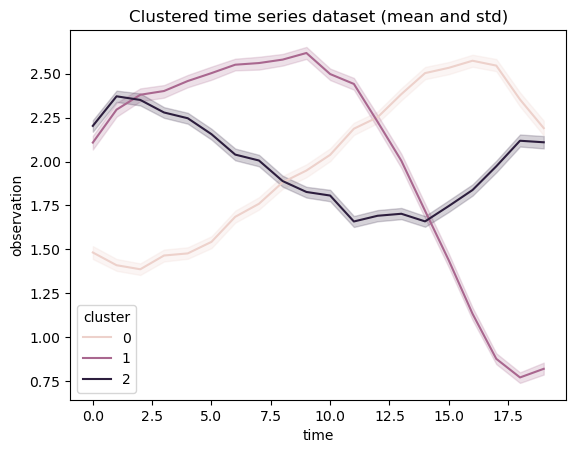

In [20]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

### DTW

In [21]:
distance_params = {'window': 0.3, 'weighted': True}
#distance_params = {'itakura_max_slope': 0.5, 'weighted': True}
clusterer = TimeSeriesKMeans(n_clusters=3, metric="dtw", distance_params=distance_params)

In [22]:
clusterer.fit(X_train)

TimeSeriesKMeans(distance_params={'weighted': True, 'window': 0.3},
                 n_clusters=3)

In [23]:
df["cluster"] = clusterer.labels_
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,cluster
0,3,0,3,3,4,0,3,2,2,0,...,3,3,0,2,3,2,1,2,3,0
1,1,2,0,1,3,2,3,3,2,2,...,2,2,2,2,3,1,2,1,3,2
2,2,1,2,0,0,3,2,3,4,4,...,4,3,0,1,1,3,0,2,0,2
3,3,4,1,2,2,3,1,3,2,3,...,0,4,3,1,2,2,1,0,0,1
4,2,3,4,1,0,1,2,3,3,2,...,4,1,4,2,0,3,0,1,2,2


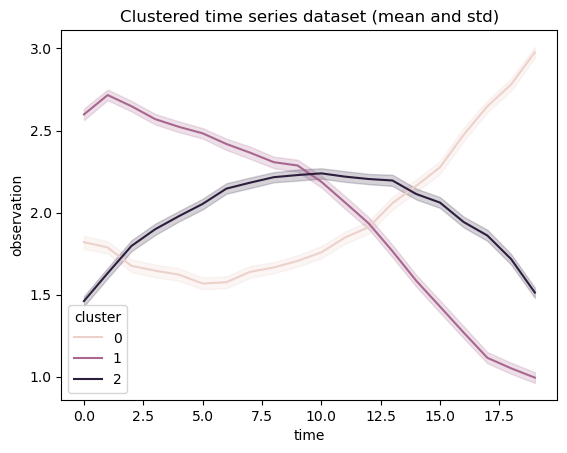

In [24]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

## Features-based Clustering

In [10]:
from sktime.transformations.series.summarize import SummaryTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.metrics import silhouette_score

In [15]:
X_train.shape

(10000, 1, 20)

In [11]:
transformer = SummaryTransformer()

In [12]:
F_train = transformer.fit_transform(X_train)
F_train

,mean,std,min,max,0.1,0.25,0.5,0.75,0.9
instances,,,,,,,,,
0,2.05,1.234376,0.0,4.0,0.0,1.75,2.0,3.00,3.0
1,2.00,0.858395,0.0,3.0,1.0,1.75,2.0,3.00,3.0
2,1.95,1.503505,0.0,4.0,0.0,0.75,2.0,3.00,4.0
3,1.95,1.234376,0.0,4.0,0.0,1.00,2.0,3.00,3.1
4,2.05,1.316894,0.0,4.0,0.0,1.00,2.0,3.00,4.0
...,...,...,...,...,...,...,...,...,...
9995,2.00,0.917663,0.0,4.0,1.0,1.75,2.0,2.25,3.0
9996,1.95,1.394538,0.0,4.0,0.0,1.00,2.0,3.00,4.0
9997,2.05,1.145931,0.0,4.0,0.9,1.00,2.0,3.00,3.1


In [28]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [29]:
# setting distance_threshold=0 ensures we compute the full tree.
# it is the linkage distance threshold above which clusters will not be merged
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='ward')
model = model.fit(F_train)

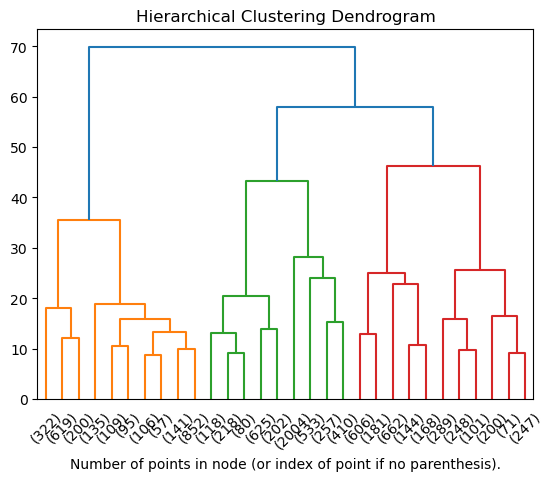

In [30]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=50)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [31]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=50, criterion='distance')
labels

array([2, 3, 1, ..., 2, 1, 2], dtype=int32)

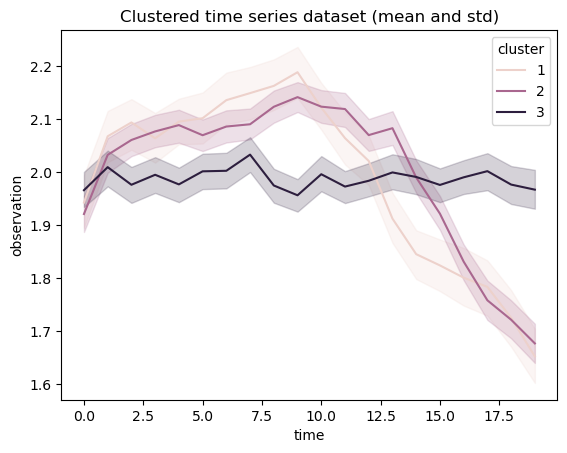

In [32]:
df["cluster"] = labels
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

<center> <h1> Motifs </h1> </center>

In [33]:
from datetime import datetime
from collections import defaultdict
from matrixprofile import *

In [34]:
ts = X_paa[0][0]

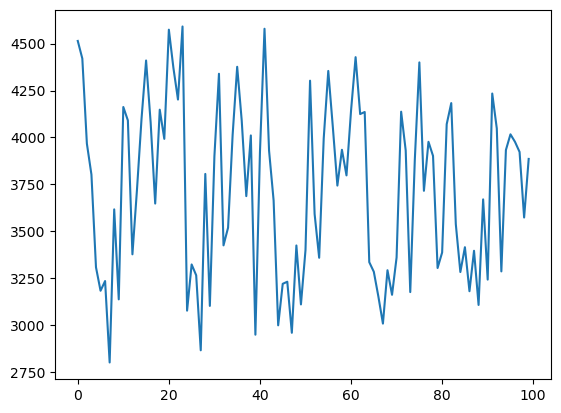

In [35]:
plt.plot(ts)
plt.show()

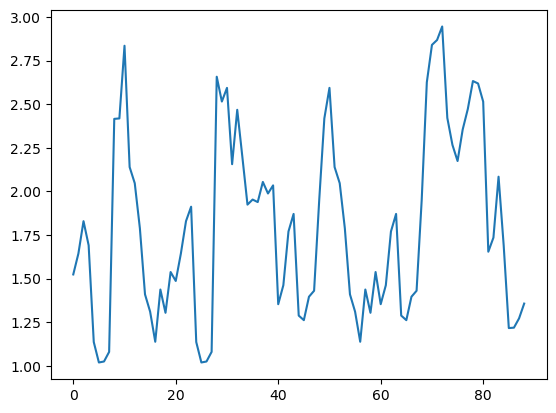

In [36]:
w = 12
mp, mpi = matrixProfile.stomp(ts, w)

plt.plot(mp)
plt.show()

In [37]:
mo, mod  = motifs.motifs(ts, (mp, mpi), max_motifs=5)

In [38]:
mo

[[5, 25, 45, 86], [16, 56], [34, 74]]

In [39]:
mod

[1.018652628222252, 1.1375122260571693, 1.9237488016825266]

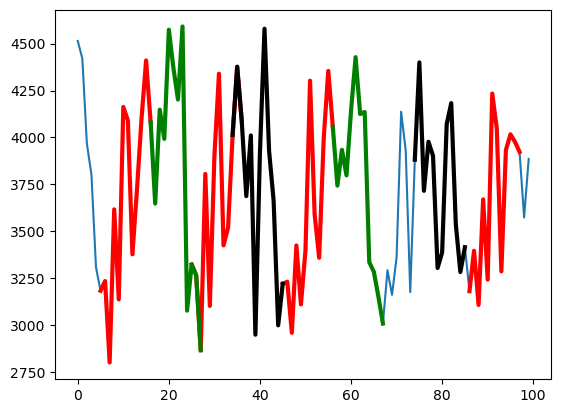

In [40]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

### discords

In [41]:
from matrixprofile.discords import discords

In [42]:
anoms = discords(mp, ex_zone=3, k=5)

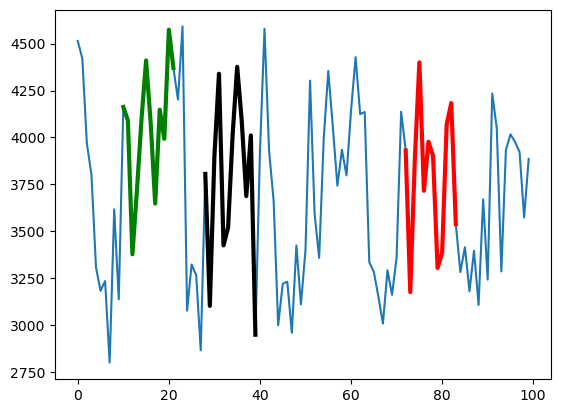

In [43]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

<center> <h1> Classification </h1> </center>

In [44]:
from sktime.transformations.compose import FitInTransform
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sktime.transformations.panel.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

from sktime.classification.shapelet_based import ShapeletTransformClassifier

### Preparation

In [45]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,cluster
0,3,0,3,3,4,0,3,2,2,0,...,3,3,0,2,3,2,1,2,3,2
1,1,2,0,1,3,2,3,3,2,2,...,2,2,2,2,3,1,2,1,3,3
2,2,1,2,0,0,3,2,3,4,4,...,4,3,0,1,1,3,0,2,0,1
3,3,4,1,2,2,3,1,3,2,3,...,0,4,3,1,2,2,1,0,0,2
4,2,3,4,1,0,1,2,3,3,2,...,4,1,4,2,0,3,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,2,0,3,2,2,2,1,1,...,2,2,2,3,3,2,4,3,2,2
9996,1,0,0,2,2,2,1,0,1,0,...,3,4,1,3,3,3,4,2,3,1
9997,4,3,2,1,1,2,3,3,2,2,...,1,1,2,0,0,3,2,3,4,2
9998,0,0,1,3,4,3,3,4,2,2,...,2,1,1,2,2,4,4,3,0,1


In [46]:
X = np.squeeze(X_paa_sax)
y = df["cluster"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 20), (2000, 20), (8000,), (2000,))

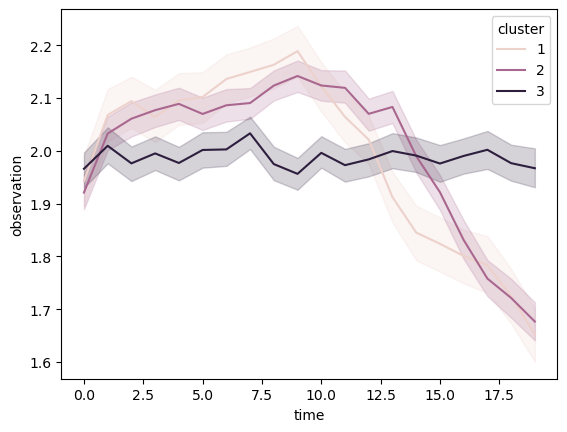

In [48]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="cluster")
plt.show()

In [49]:
scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

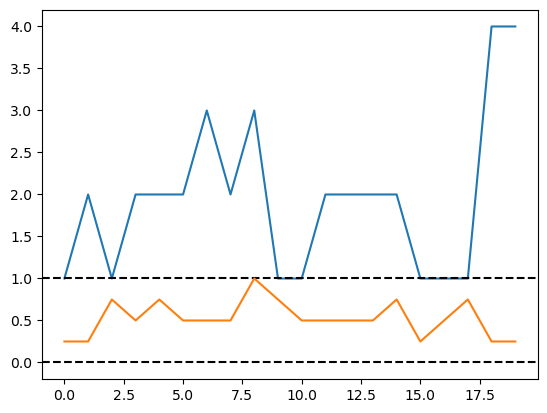

In [50]:
# check that the means and std of each series are 0 and 1
X_train_scaled.min(axis=(0, 1)), X_train_scaled.max(axis=(0, 1))
plt.plot(X_train[0].ravel())
plt.axhline(0, color="black", linestyle="--")
plt.axhline(1, color="black", linestyle="--")
plt.plot(X_train_scaled[1].ravel())

### KNN

In [51]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw")

In [52]:
%%time
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.46      0.55       527
           2       0.65      0.55      0.59       890
           3       0.57      0.89      0.70       583

    accuracy                           0.62      2000
   macro avg       0.64      0.63      0.61      2000
weighted avg       0.64      0.62      0.61      2000

CPU times: total: 33.4 s
Wall time: 34 s


### Shapelet transform

In [53]:
st = ShapeletTransformClassifier()

In [ ]:
%%time
st.fit(X_train_scaled, y_train)
y_pred = st.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

###### Ci sono poi altri metodi per classificare con gli shapelets, che dividono passo passo quello che fa lo ShapeletTransformClassifier